# DATA-641 Homework 3
Max Calzada

## Exercise 1 Visualizing Embeddings

### (a)

As an input data for our visualization problem, we will use articles from Google News.
Pre-trained vectors trained on part of Google News dataset (about 100 billion words) was
published by Google at the official page. For the first part, load the pre-trained word
embeddings from GoogleNews-vectors-negative300.bin

In [1]:
# Code based off of: https://www.tutorialsteacher.com/python/python-read-write-file#:~:text=To%20open%20a%20file%20in,files%20are%20not%20human%2Dreadable.
# Didn't work:
    # gNews = open('C:/Users/maxcalzada/Desktop/DATA-641/GoogleNews-vectors-negative300.bin', 'rb') # opening a binary file
    # gNews = open('/Users/maxcalzada/Desktop/DATA-641/GoogleNews-vectors-negative300.bin', 'rb') # opening a binary file

# Not sure what to do with .bin.gz
    # gNews = open('Users/maxcalzada/Desktop/DATA-641/GoogleNews-vectors-negative300.bin.gz', 'rb') # opening a binary file 

gNews = open('GoogleNews-vectors-negative300.bin', 'rb') # opening a binary file
gNews_r = gNews.read() # # reading all lines

In [2]:
import pandas as pd
import numpy as np

### (b)

With the increase in the amount of data, it becomes more and more difficult to visualize
and interpret. In practice, similar words are combined into groups for further visualization.
Use the following code segment to select key words.

`keys = [’Paris’, ’Python’, ’Sunday’, ’Tolstoy’, ’Twitter’, ’bachelor’,
’delivery’, ’election’, ’expensive’, ’experience’, ’financial’, ’food’,
’iOS’, ’peace’, ’release’, ’war’]`

Then use the code from this website and prepare word vectors for visualization.

In [3]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor',
'delivery', 'election', 'expensive', 'experience', 'financial', 'food',
'iOS', 'peace', 'release', 'war']

# Code based off of: https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
    # The basic idea of t-SNE is to reduce dimensional space keeping relative pairwise distance between points

import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [4]:
# Code based off of: https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
    # Word2Vec takes sentences as an input data and produces word vectors as an output.

import re
import codecs


def preprocess_text(text):
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


def prepare_for_w2v(filename_from, filename_to, lang):
    raw_text = codecs.open(filename_from, "r", encoding='windows-1251').read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        for sentence in nltk.sent_tokenize(raw_text, lang):
            print(preprocess_text(sentence.lower()), file=f)

In [5]:
# Code based off of: https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

    # On the Word2Vec training stage the following hyperparameters were used:
        # Dimensionality of the feature vector is 200.
        # The maximum distance between analyzed words within a sentence is 5.
        # Ignores all words with the total frequency lower than 5 per corpus.

import multiprocessing
from gensim.models import Word2Vec


def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, vector_size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())

In [6]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [7]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

### (c) 
T-SNE stands for t-distributed Stochastic Neighboring Entities. It is a useful tool in order
to visualize high dimensional data. One of the main goals when using t-SNE is to take a
set of points in a high-dimensional space and find a faithful representation of those points
in a lower-dimensional space, typically the 2D plane. The algorithm is non-linear and
adapts to the underlying data, performing different transformations on different regions.
Carefully read the article, do the following:

#### (i) 
Try different values for perplexity, 30, 25, 20, and 5 and keep the rest of the param-
eters constant. What value of perplexity provides the most interpretable results?

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


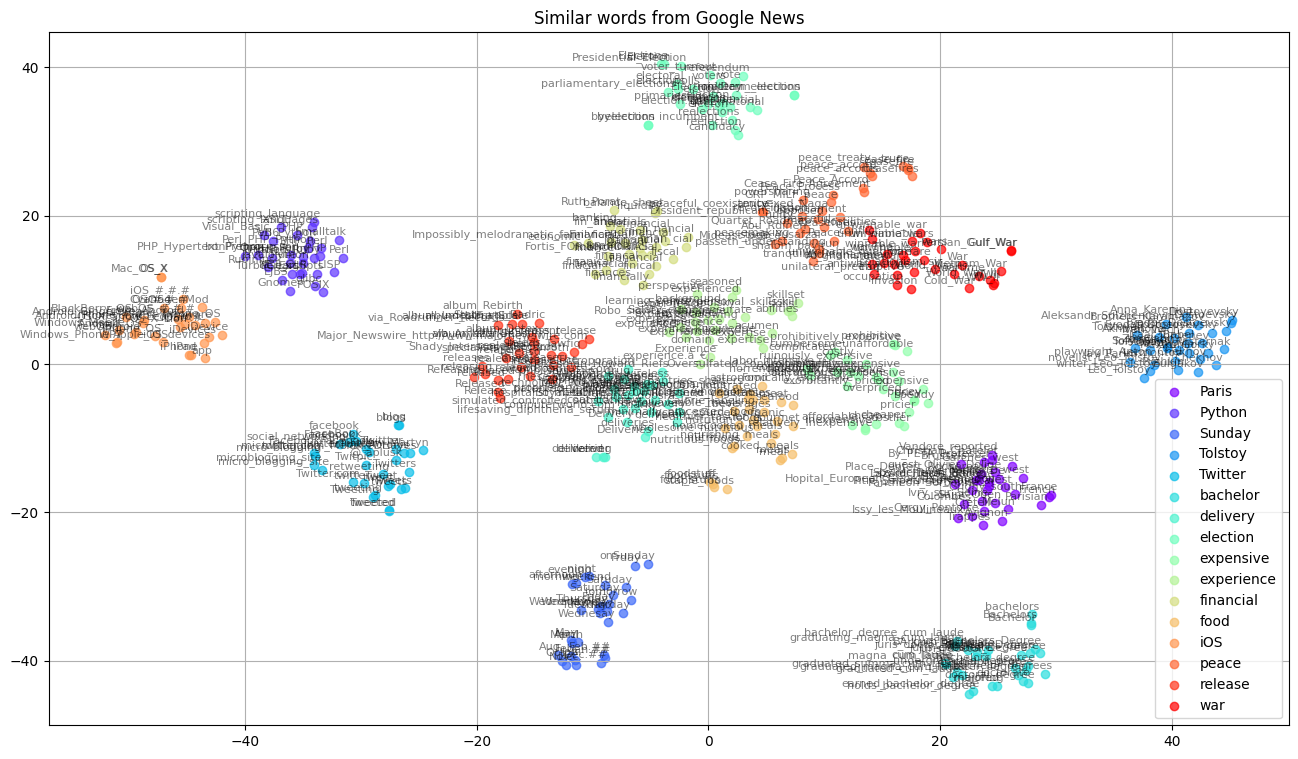

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
%matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [9]:
# perplexity = 5

# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
tsne_model_en_2d_p5 = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d_p5 = np.array(tsne_model_en_2d_p5.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


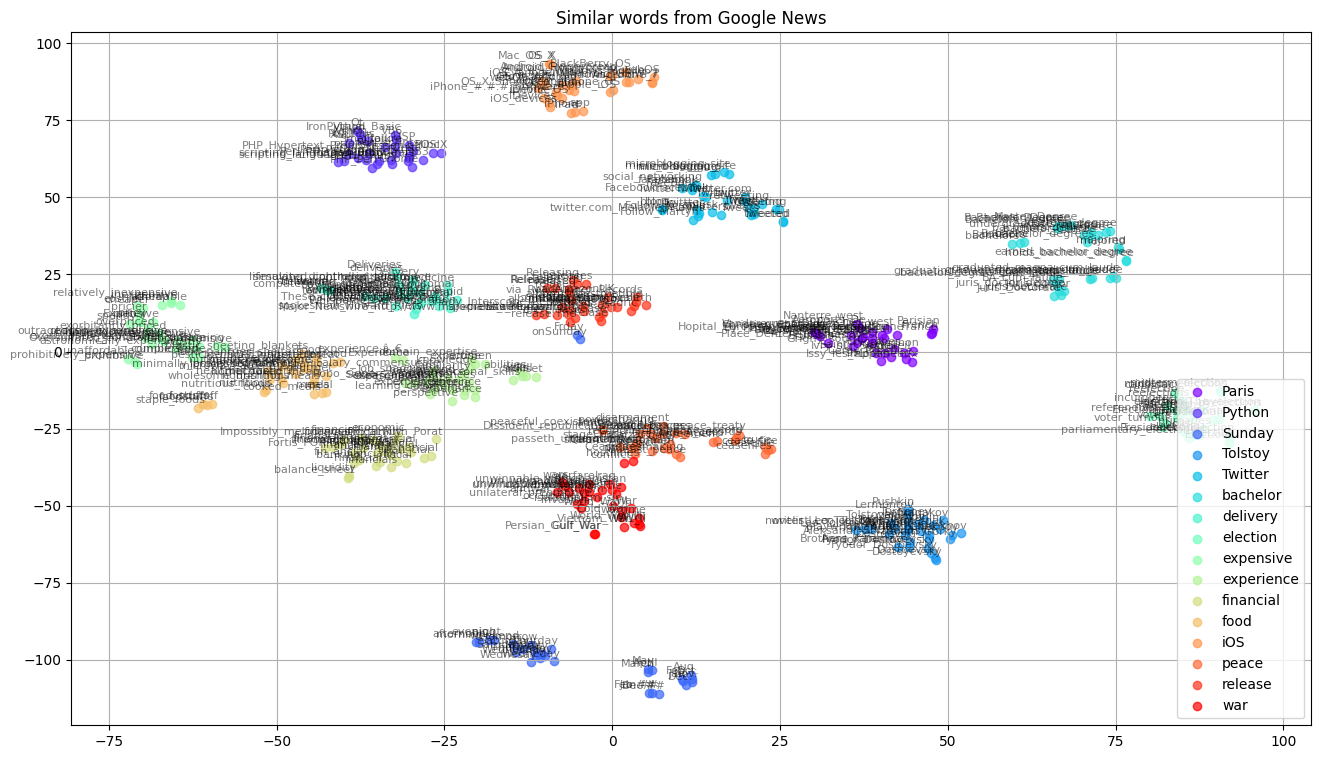

In [10]:
tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d_p5, word_clusters, 0.7,
                        'similar_words.png')

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


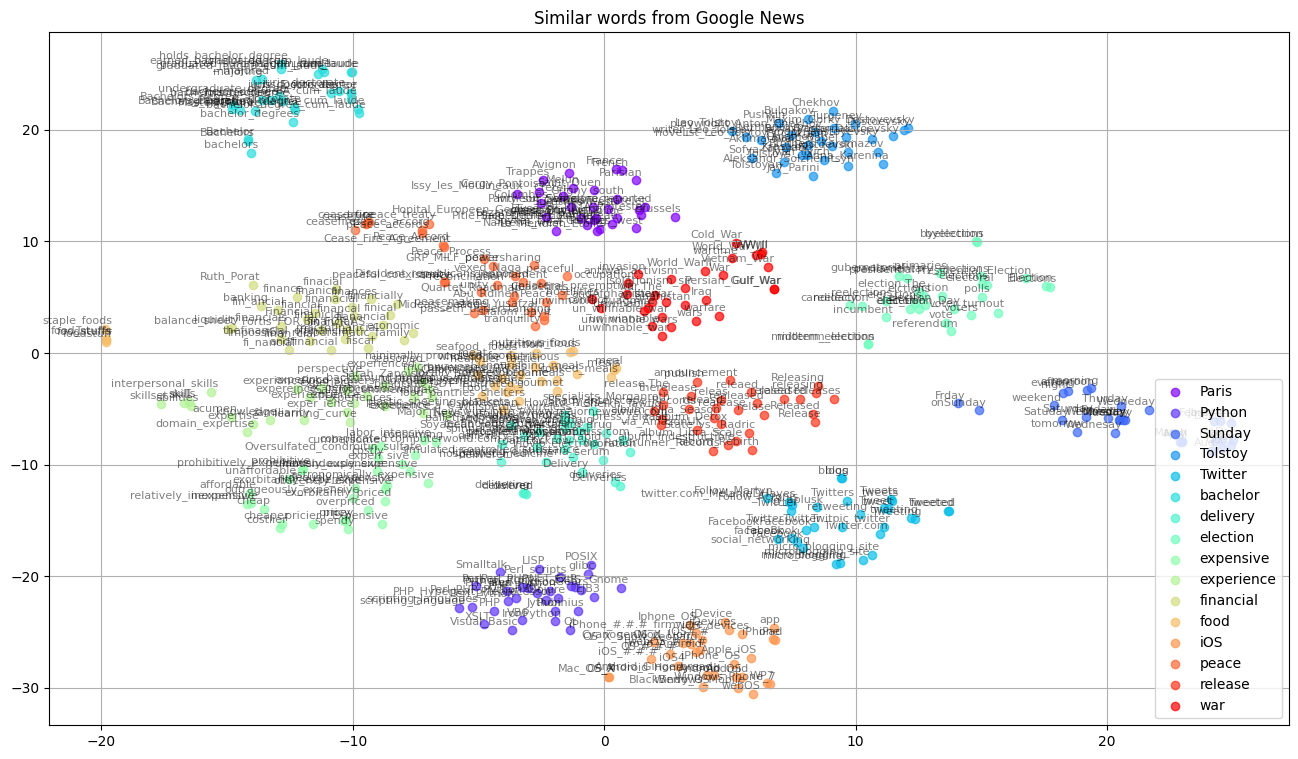

In [11]:
# perplexity = 30

# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
tsne_model_en_2d_p30 = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d_p30 = np.array(tsne_model_en_2d_p30.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d_p30, word_clusters, 0.7,
                        'similar_words.png')

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


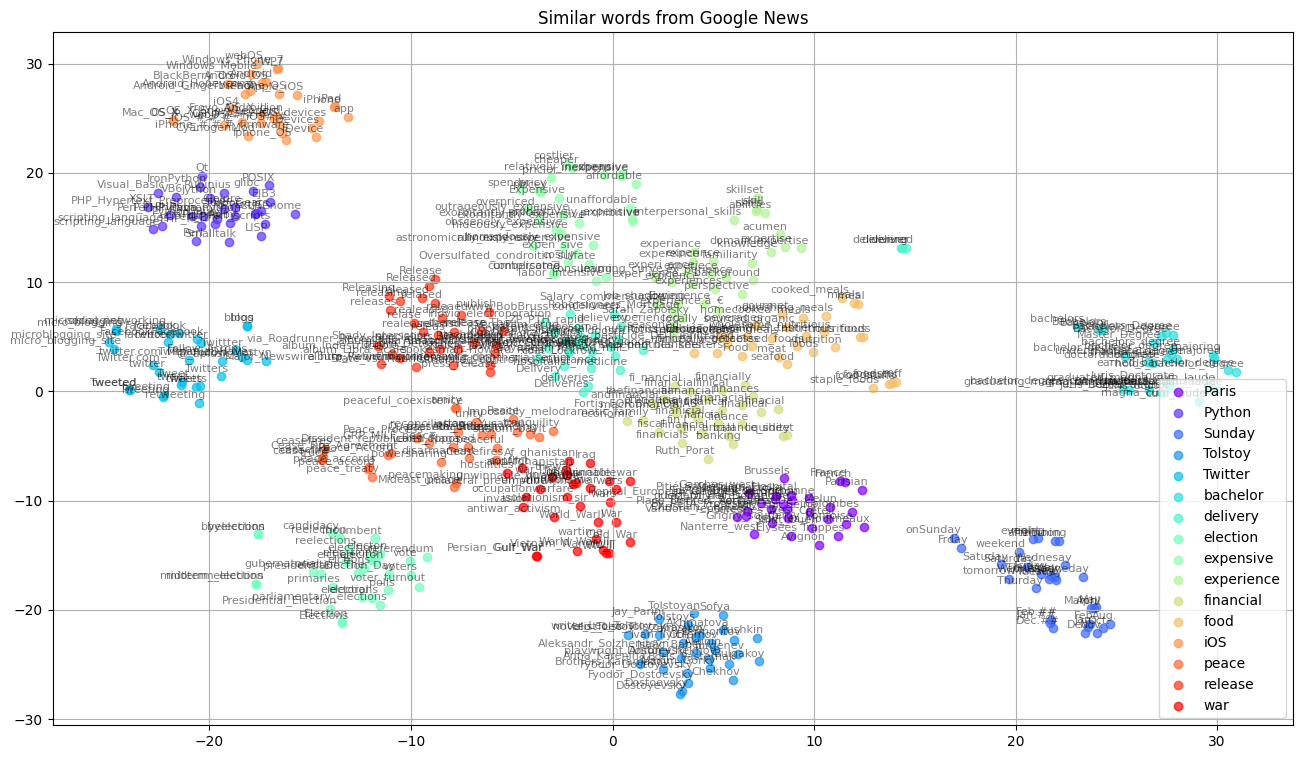

In [12]:
# perplexity = 25

# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
tsne_model_en_2d_p25 = TSNE(perplexity=25, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d_p25 = np.array(tsne_model_en_2d_p25.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d_p25, word_clusters, 0.7,
                        'similar_words.png')

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


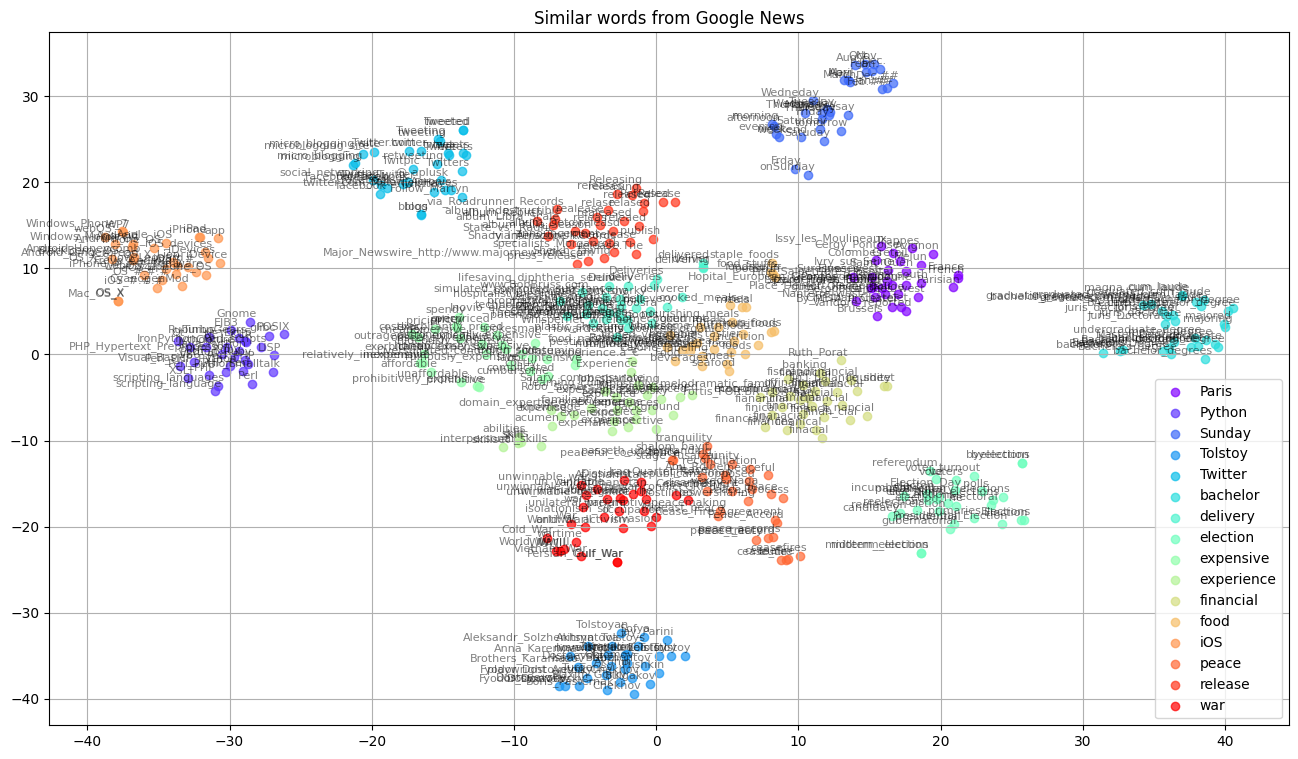

In [13]:
# perplexity = 20

# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
tsne_model_en_2d_p20 = TSNE(perplexity=20, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d_p20 = np.array(tsne_model_en_2d_p20.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d_p20, word_clusters, 0.7,
                        'similar_words.png')

#### 1 ( ci ) Answer:
I believe a perplexity of 25 or 30 provides the most interpretable results because those levels of perplexity best balance the difference within and between groups.

#### (ii) 
Fix the best value for perplexity and plot results using different number of iterations.
What do you observe?

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


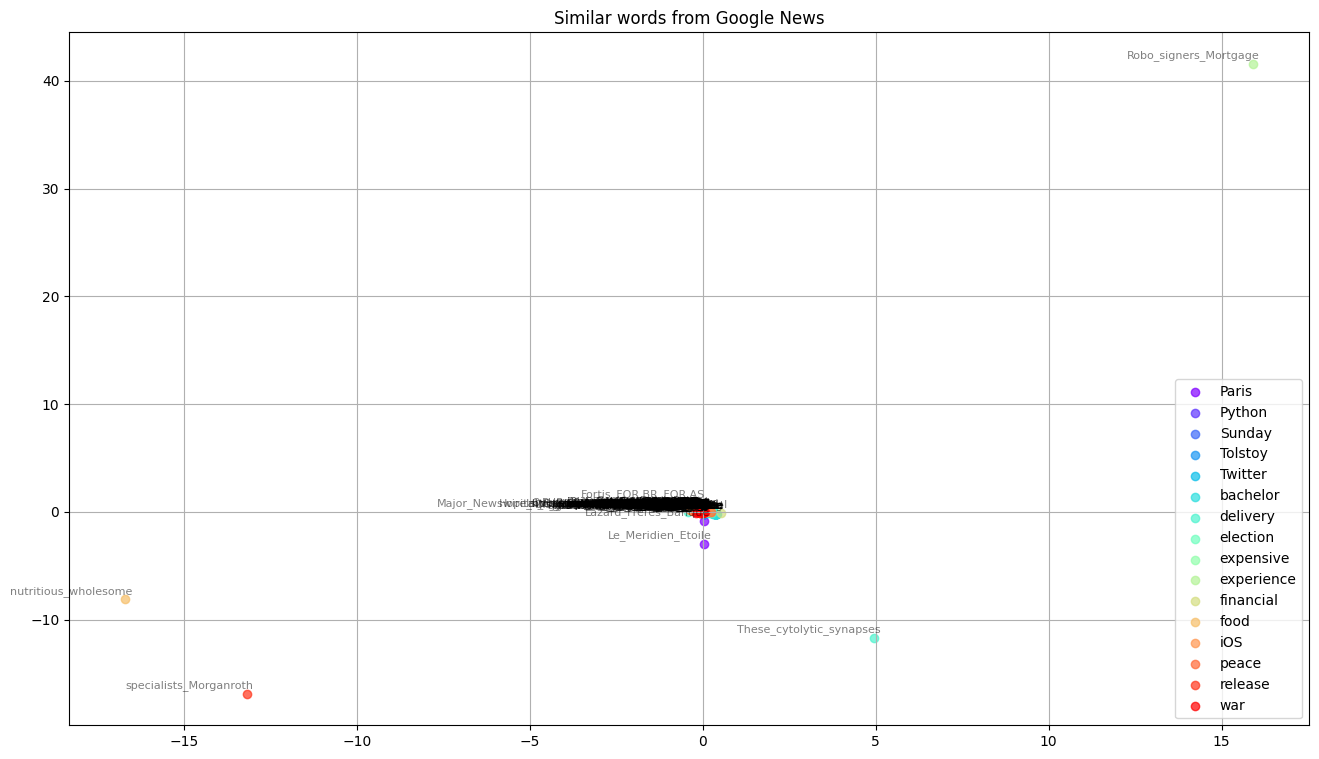

In [15]:
# n_iter=35, perplexity=25

# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
tsne_model_en_2d_i250 = TSNE(perplexity=25, n_components=2, init='pca', n_iter=250, random_state=32)
embeddings_en_2d_i250 = np.array(tsne_model_en_2d_i250.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d_i250, word_clusters, 0.7,
                        'similar_words.png')

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


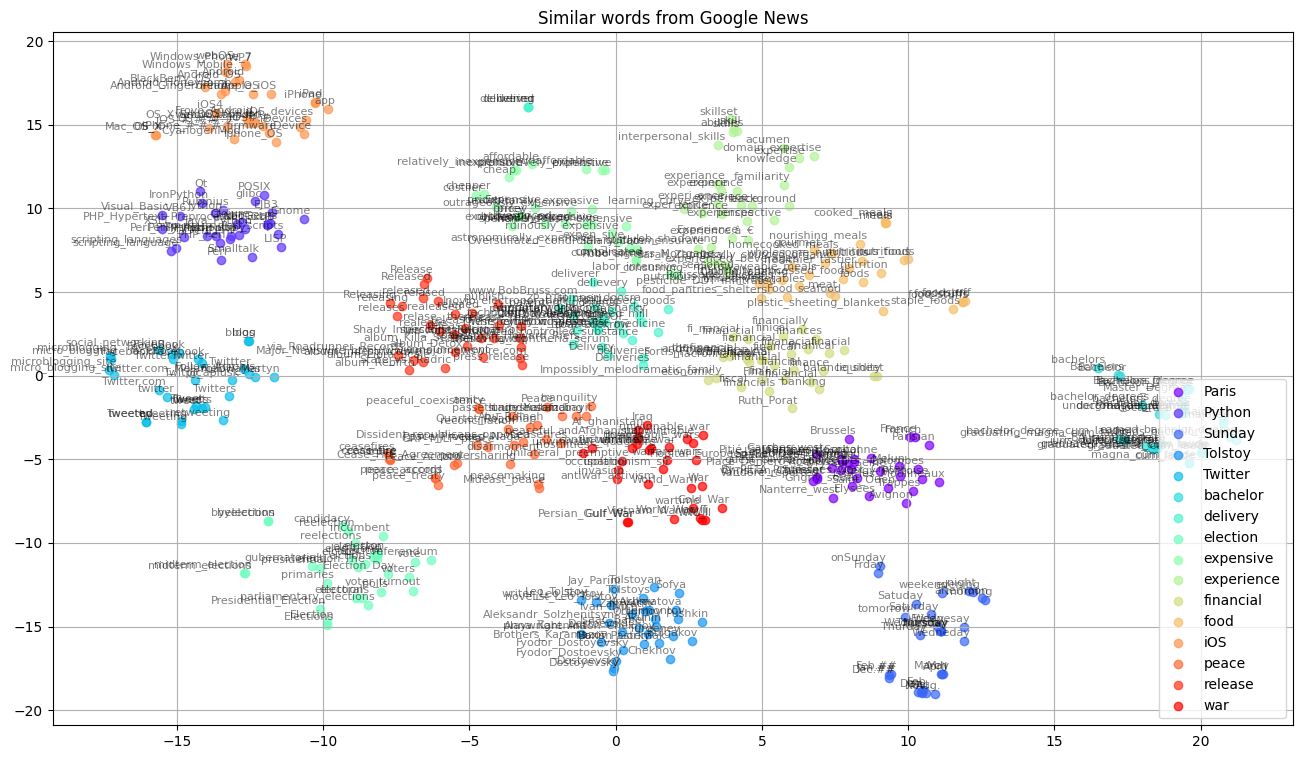

In [16]:
# n_iter=350, perplexity=25

# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
tsne_model_en_2d_i350 = TSNE(perplexity=25, n_components=2, init='pca', n_iter=350, random_state=32)
embeddings_en_2d_i350 = np.array(tsne_model_en_2d_i350.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d_i350, word_clusters, 0.7,
                        'similar_words.png')

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


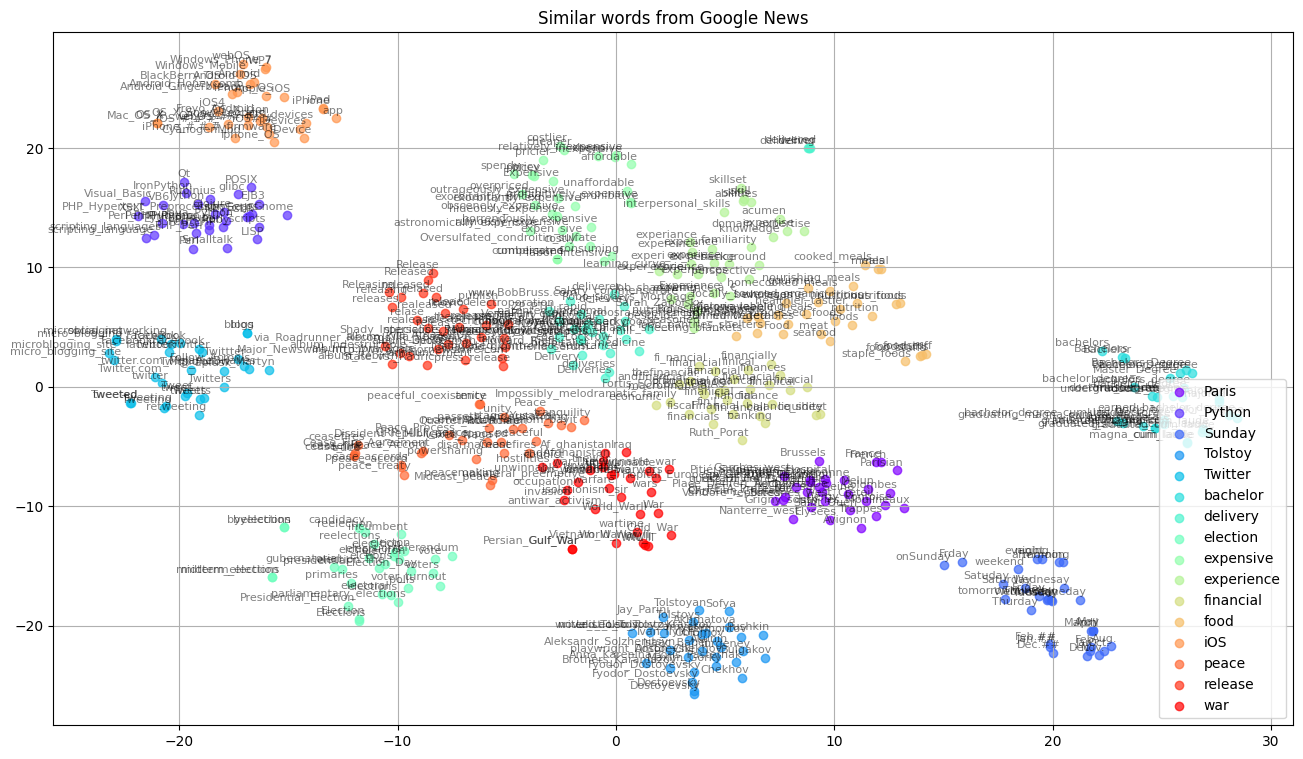

In [17]:
# n_iter=700, perplexity=25

# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
tsne_model_en_2d_i700 = TSNE(perplexity=25, n_components=2, init='pca', n_iter=700, random_state=32)
embeddings_en_2d_i700 = np.array(tsne_model_en_2d_i700.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d_i700, word_clusters, 0.7,
                        'similar_words.png')

#### 1 ( cii ) Answer:
It appears as though the T-SNE graph "stabilizes" at some point between 250 and 350 iterations.

At 250 iterations, all the points from all graphs are all right next to each other. By 350 iterations, the points are spread out enough that the distances between and within groups is more clearly displayed.

#### (iii)
Jeep all parameters constant and evaluate the performance of t-SNE visualization
by using either a pca or random initialization. What do you observe?

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


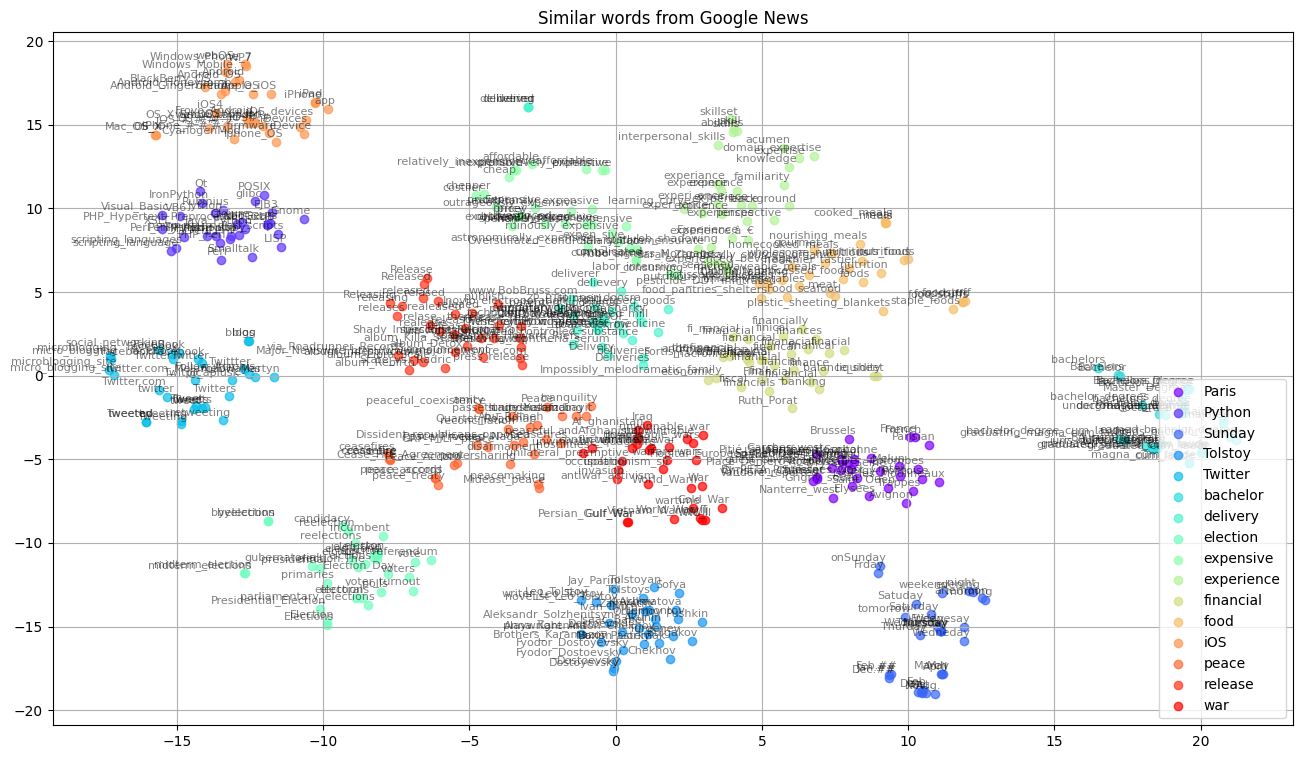

In [18]:
# init='pca', n_iter=350, perplexity=25

# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
tsne_model_en_2d_i350 = TSNE(perplexity=25, n_components=2, init='pca', n_iter=350, random_state=32)
embeddings_en_2d_i350 = np.array(tsne_model_en_2d_i350.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d_i350, word_clusters, 0.7,
                        'similar_words.png')

<ipython-input-8-1b8bcfded106>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


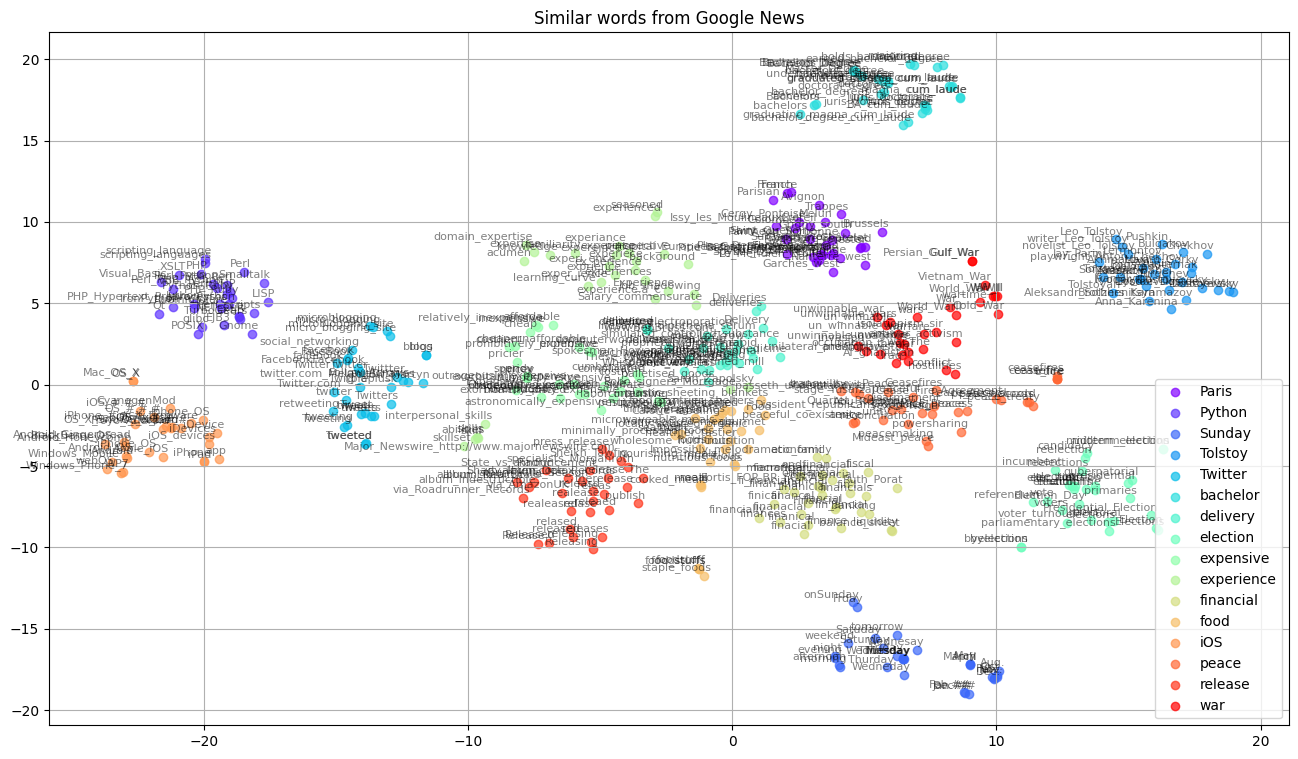

In [20]:
# init='pca', n_iter=350, perplexity=25

# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
tsne_model_en_2d_ran = TSNE(perplexity=25, n_components=2, init='random', n_iter=350, random_state=32)
embeddings_en_2d_ran = np.array(tsne_model_en_2d_ran.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d_ran, word_clusters, 0.7,
                        'similar_words.png')

#### 1 ( ciii ) Answer:

For both T-SNEs, I set `n_iter=350, perplexity=25`. Both the `random` and the `pca` T-SNEs balance the distances between and within the groups.

To me, it looks as though both T-SNEs have produced the same "shape", expect that this shape has been rotated to two different angles by the two T-SNE models.

## Exercise 2 Spam Classification 
For this exercise we will classify if an SMS is SPAM or HAM using the SMS Spam Collection Dataset located in spam.csv. Perform the following:

### (a) 
Load the dataset and perform basic pre-processing similar to your previous homework. Make sure that the column with the labels has been converted to numerical values, e.g. 0 and 1.

In [8]:
import numpy as np
import pandas as pd #to work with csv files

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction import stop_words

from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.base import TransformerMixin

#pre-processing of text
import string
import re

#import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
spam = pd.read_csv('spam.csv', encoding="cp1252")

In [10]:
spam['v1'] = spam['v1'].replace('ham', 0)
spam['v1'] = spam['v1'].replace('spam', 1)

In [11]:
spam

v1                                                 v2
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
...   ..                                                ...
5567   1  This is the 2nd time we have tried 2 contact u...
5568   0              Will Ì_ b going to esplanade fr home?
5569   0  Pity, * was in mood for that. So...any other s...
5570   0  The guy did some bitching but I acted like i'd...
5571   0                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [12]:
def clean_text(str_list, lemmatize = True):
    clean_list = []
    
    for text in str_list:
        # to drop pound sign from hash tags
        text = re.sub(r'#', '', text)
        text = text.lower()
        words = word_tokenize(text)
        clean_words = []
        
        for word in words:            
            # drop words with fewer than 2 characters; drop any punctuation "words"
            if (len(word) > 1) and (re.match(r'^\w+$', word)):

                if lemmatize:
                    lemmatizer = WordNetLemmatizer()
            
                clean_words.append(word)
        clean_text = ' '.join(clean_words)
        clean_list.append(clean_text)
    
    return clean_list

In [13]:
spam['clean_v2'] = clean_text(spam['v2'])

In [14]:
spam

v1                                                 v2  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif u oni...   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
3      0  U dun say so early hor... U c already then say...   
4      0  Nah I don't think he goes to usf, he lives aro...   
...   ..                                                ...   
5567   1  This is the 2nd time we have tried 2 contact u...   
5568   0              Will Ì_ b going to esplanade fr home?   
5569   0  Pity, * was in mood for that. So...any other s...   
5570   0  The guy did some bitching but I acted like i'd...   
5571   0                         Rofl. Its true to its name   

                                               clean_v2  
0     go until jurong point crazy available only in ...  
1                                 ok lar joking wif oni  
2     free entry in wkly comp to win fa cup final tk...  
3                 dun say so early hor already then say  
4     nah do think he goes to usf he lives around he...  
...                                                 ...  
5567  this is the 2nd time we have tried contact hav...  
5568                 will ì_ going to esplanade fr home  
5569  pity was in mood for that so any other suggest...  
5570  the guy did some bitching but acted like be in...  
5571                          rofl its true to its name  

[5572 rows x 3 columns]

### (b)

Use a pre-trained Word2vec model for feature extraction. For your text classification use
Support Vector Machine (SVM). In addition, do a nested K-fold cross-validation. Report
the accuracy, precision, recall, and f1-score

In [15]:
# Word2Vec_Classification.ipynb

import os
from time import time

import numpy as np
import pandas as pd #to work with csv files

#pre-processing imports
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from string import punctuation

#imports related to modeling
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
from numpy import nan, NaN, NAN
import math

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
data_path= "content"
%time w2v_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=200000)
print('done loading Word2Vec')

CPU times: user 1.94 s, sys: 307 ms, total: 2.25 s
Wall time: 2.29 s
done loading Word2Vec


In [19]:
# Inspect the model
word2vec_vocab = w2v_model.key_to_index # word2vec_vocab = w2v_model.vocab.keys()
  # word2vec_vocab = w2v_model.key_to_index()
word2vec_vocab_lower = [item.lower() for item in word2vec_vocab]
print(len(word2vec_vocab))

200000


In [20]:
#strip_handles removes personal information such as twitter handles, which don't
#contribute to emotion in the tweet. preserve_case=False converts everything to lowercase.
tweeter = TweetTokenizer(strip_handles=True,preserve_case=False)
mystopwords = set(stopwords.words("english"))

#Function to tokenize tweets, remove stopwords and numbers. 
#Keeping punctuations and emoticon symbols could be relevant for this task!
def preprocess_corpus(texts):
    def remove_stops_digits(tokens):
        #Nested function that removes stopwords and digits from a list of tokens
        return [token for token in tokens if token not in mystopwords and not token.isdigit()]
    #This return statement below uses the above function to process twitter tokenizer output further. 
    return [remove_stops_digits(tweeter.tokenize(content)) for content in texts]

# X_

#df_subset contains only the three categories we chose. 
X_2b = preprocess_corpus(spam['clean_v2'])
y_2b = spam['v1']
print(len(X_2b), len(y_2b))

5572 5572


In [21]:
# Creating a feature vector by averaging all embeddings for all sentences
def embedding_feats(list_of_lists):
    DIMENSION = 300
    zero_vector = np.zeros(DIMENSION)
    feats = []
    for tokens in list_of_lists:
        feat_for_this =  np.zeros(DIMENSION)
        count_for_this = 0
        for token in tokens:
            if token in w2v_model:
                feat_for_this += w2v_model[token]
                count_for_this +=1
        feats.append(feat_for_this/count_for_this)        
    return feats

train_vectors_2b = embedding_feats(X_2b)
print(len(train_vectors_2b))

<ipython-input-21-5533a67a267e>:13: RuntimeWarning: invalid value encountered in true_divide
  feats.append(feat_for_this/count_for_this)


5572


In [22]:

# after vectorizing, you should have a list of lists

# convert list of lists to a data frame
# df = pd.DataFrame(list_of_lists)
df_2b = pd.DataFrame(train_vectors_2b)
  # do I insert X_2b or train_vectors

# df.shape should be (5572, 300)

# check which rows are not null
notnullrows = df_2b[0].notnull()

# this results in a list of True/False values

# use indexing to select only rows that are not null
X_2b_nn_2 = df_2b.loc[notnullrows, ]
y_2b_nn_2 = spam["v1"][notnullrows]

In [36]:
#Take any classifier (LogisticRegression here, and train/test it like before.
classifier = SVC()
train_data, test_data, train_y, test_y = train_test_split(X_2b_nn_2, y_2b_nn_2)
classifier.fit(train_data, train_y)
print("Accuracy: ", classifier.score(test_data, test_y))
preds = classifier.predict(test_data)
print(classification_report(test_y, preds))

Accuracy:  0.9826086956521739
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1194
           1       0.96      0.91      0.93       186

    accuracy                           0.98      1380
   macro avg       0.97      0.95      0.96      1380
weighted avg       0.98      0.98      0.98      1380



In [23]:
# Nested_cross_validation_Example.ipynb

class SparseToDense(TransformerMixin):
    
    def fit(self, X, y = None, **fit_params):
        return self
    
    def transform(self, X, y = None, **fit_params):
        return X.toarray()

In [24]:
# Nested_cross_validation_Example.ipynb

# create pipeline
pipe = Pipeline([
    ('vectorize', train_vectors_2b), # tfidf
    ('densify', SparseToDense()),
    ('scale', StandardScaler()),
    ('classify', SVC())
])

In [39]:
# Nested_cross_validation_Example.ipynb

# SVC hyperparams to optimize
kernel = ['rbf', 'linear'] # 'poly', 'sigmoid'
C = [0.1, 1] # 0.01,
# set up parameter grid
params = {
    'classify__kernel': kernel,
    'classify__C': C
}

In [40]:
# Nested_cross_validation_Example.ipynb

# Set CV scheme for inner and outer loops

# The inner loop can call scikit-learn’s GridSearchCV to achieve grid search of hyperparameter 
# evaluated on the inner loop val set
inner_cv = KFold(n_splits = 3, shuffle = True, random_state = 1) 
# Outer loop can call cross_val_score for generalization error
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 1) 

# Set up GridSearch for inner loop
grid_SVC = GridSearchCV(pipe, params, cv = inner_cv)

In [ ]:
# Nested_cross_validation_Example.ipynb

# Nested CV scores
scores = cross_validate(grid_SVC,
                        X = X_2b_nn_2,
                        y = y_2b_nn_2,
                        cv = outer_cv,
                        scoring = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall'],
                        return_estimator = True)
auc = scores['test_roc_auc']
accuracy = scores['test_accuracy']
f1 = scores['test_f1']
precision = scores['test_precision']
recall = scores['test_recall']
estimators = scores['estimator']

In [50]:
print(accuracy)
print(accuracy.mean())

print(precision)
print(precision.mean())

print(recall)
print(recall.mean())

print(f1)
print(f1.mean())

NameError: ignored

#### 2b) Answer:

When I try to run the `scores` command, my computer runs for more than 10 minutes, and then my Google Colab session collapses.

### (c)
By keeping the same setup as in (b), compare the classification performance when using
tf-idf for feature extraction.

In [25]:
from sklearn.decomposition import NMF, PCA, TruncatedSVD, FastICA

In [24]:
# NLP_Pipeline.ipynb

tfidf = TfidfVectorizer(lowercase = True,
                        stop_words = 'english',
                        ngram_range = (1,1),
                        max_features = 1000)

pca = PCA()

# number of components (topics) to try:
ncomps = [50]

from sklearn.base import TransformerMixin

In [25]:
# NLP_Pipeline.ipynb

class SparseToDense(TransformerMixin):
    
    def fit(self, X, y = None, **fit_params):
        return self
    
    def transform(self, X, y = None, **fit_params):
        return X.toarray()

In [26]:
# NLP_Pipeline.ipynb

# pull out relevant data
X_2c = spam['clean_v2'] # spam['clean_v2'] = clean_text(spam['v2'])
y_2c = spam['v1']

X_count_2c = tfidf.fit_transform(X_2c)
#print(X_count)

In [27]:
# NLP_Pipeline.ipynb

# create pipeline
pipe_2c = Pipeline([
    ('vectorize', tfidf),
    ('densify', SparseToDense()),
    ('scale', StandardScaler()),
    ('dim_red', pca),
    ('classify', SVC())
])

In [28]:
# NLP_Pipeline.ipynb

# SVC hyperparams to optimize
kernel = ['rbf', 'linear', 'poly', 'sigmoid']
C = [0.01, 0.1, 1] # C = [0.001, 0.01, 0.1, 1, 10]
# set up parameter grid
params = {
    'dim_red__n_components': ncomps,
    'classify__kernel': kernel,
    'classify__C': C
}

In [29]:
# NLP_Pipeline.ipynb

# Set CV scheme for inner and outer loops
inner_cv = KFold(n_splits = 3, shuffle = True, random_state = 1)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

# Set up GridSearch for inner loop
grid_SVC = GridSearchCV(pipe_2c, params, cv = inner_cv)
#grid_SVC.fit(X, y)

# Nested CV scores
scores = cross_validate(grid_SVC,
                        X = X_2c,
                        y = y_2c,
                        cv = outer_cv,
                        scoring = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall'],
                        return_estimator = True)
auc = scores['test_roc_auc']
accuracy = scores['test_accuracy']
f1 = scores['test_f1']
precision = scores['test_precision']
recall = scores['test_recall']
estimators = scores['estimator']

In [30]:
# NLP_Pipeline.ipynb

print(accuracy)
accuracy.mean()

print(precision)
precision.mean()

print(recall)
recall.mean()

print(f1)
f1.mean()

[0.97399103 0.95246637 0.96050269 0.96858169 0.96768402]
[0.94354839 0.9        0.89542484 0.88732394 0.88321168]
[0.84172662 0.74522293 0.83030303 0.86896552 0.85815603]
[0.88973384 0.81533101 0.86163522 0.87804878 0.8705036 ]


0.8630504896986075

In [31]:
# NLP_Pipeline.ipynb

for i in estimators:
    print(i.best_params_)
    print('\n')

{'classify__C': 1, 'classify__kernel': 'linear', 'dim_red__n_components': 50}


{'classify__C': 1, 'classify__kernel': 'linear', 'dim_red__n_components': 50}


{'classify__C': 1, 'classify__kernel': 'linear', 'dim_red__n_components': 50}


{'classify__C': 0.1, 'classify__kernel': 'linear', 'dim_red__n_components': 50}


{'classify__C': 0.1, 'classify__kernel': 'linear', 'dim_red__n_components': 50}




### (d)
Choose three “ham” and three “spam” sms and use LIME to interpret your predictions
for both Word2Vec as well as tf-idf feauturization methods and for the same classification
algorithm, i.e., SVM. Which feauturization method provides the best performance in terms
of interpretability? Note that answers are not unique.

In [51]:
import numpy as np
import pandas as pd #to work with csv files

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

#import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
#pre-processing of text
import string
import re

#import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

#import time function from time module to track the training duration
from time import time

In [53]:
# !pip install lime

In [55]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [59]:
#Take any classifier (LogisticRegression here, and train/test it like before.
classifier = SVC()
X_train, X_test, y_train, test_y = train_test_split(X_2b_nn_2, y_2b_nn_2)
classifier.fit(X_train, y_train)
# print("Accuracy: ", classifier.score(test_data, test_y))
preds = classifier.predict(X_test)
# print(classification_report(test_y, preds))

In [60]:
#Train a classifier
vect = CountVectorizer(lowercase = True,
                        stop_words = 'english',
                        ngram_range = (1,1)) #instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)#combined step 2 and 3
X_test_dtm = vect.transform(X_test)

classifier = LogisticRegression(class_weight='balanced') #instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) #fit the model with training data

#Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

#Until here, it is the same code as earlier.

AttributeError: ignored

In [61]:
y_pred_prob = classifier.predict_proba(X_test_dtm)[:, 1]
c = make_pipeline(vect, classifier)
mystring = list(X_test)[2] #Take a string from test instance
print(c.predict_proba([mystring])) #Prediction is a "reliable" here.
class_names = ["reliable", "unreliable"] 
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba, num_features=6)
exp.as_list()

AttributeError: ignored

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

### (d) attempt 1
Choose three “ham” and three “spam” sms and use LIME to interpret your predictions
for both Word2Vec as well as tf-idf feauturization methods and for the same classification
algorithm, i.e., SVM. Which feauturization method provides the best performance in terms
of interpretability? Note that answers are not unique.

In [37]:
#import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Word2Vec

In [ ]:
X_2b_nn_2, y_2b_nn_2

In [34]:
X_train_2d_w, X_test_2d_w, y_train_2d_w, y_test_2d_w = train_test_split(X_2b_nn_2, y_2b_nn_2)

In [38]:
#Train a classifier
vect = CountVectorizer(lowercase = True,
                       stop_words = 'english',
                       ngram_range = (1,1)) #instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train_2d_w)#combined step 2 and 3
X_test_dtm = vect.transform(X_tX_test_2d_west)

classifier = LogisticRegression(class_weight='balanced') #instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train_2d_w) #fit the model with training data

#Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_ty_test_2d_west, y_pred_class))

#Until here, it is the same code as earlier.

AttributeError: ignored

In [ ]:
# Lecture_8_Interpretations.html

#!pip install lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

y_pred_prob = classifier.predict_proba(X_test_dtm)[:, 1]
c = make_pipeline(vect, classifier)
mystring = list(X_test)[2] #Take a string from test instance
print(c.predict_proba([mystring])) #Prediction is a "reliable" here.
class_names = ["reliable", "unreliable"] 
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba, num_features=6)
exp.as_list()

In [ ]:
# Lecture_8_Interpretations.html

%matplotlib inline
fig = exp.as_pyplot_figure()

### (d) attempt 2
Choose three “ham” and three “spam” sms and use LIME to interpret your predictions
for both Word2Vec as well as tf-idf feauturization methods and for the same classification
algorithm, i.e., SVM. Which feauturization method provides the best performance in terms
of interpretability? Note that answers are not unique.

In [ ]:
[:3].reset_index(drop = True) # choose other 3

In [43]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=81bec5614fc5a493c2fd2bf519b47c33add510aa1504319a5d884e8127ea069e
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [40]:
# Lecture_8_Interpretations.html

import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#Step 1: train-test split
X_2d = spam['clean_v2'] #the column text contains textual data to extract features from
y_2d = spam['v1'] #this is the column we are learning to predict. 

print(X_2d.shape, y_2d.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
#random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_2d)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5572,) (5572,)
(4179,) (4179,)
(1393,) (1393,)


In [41]:
#Train a classifier
vect = CountVectorizer(lowercase = True,
                        stop_words = 'english',
                        ngram_range = (1,1)) #instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)#combined step 2 and 3
X_test_dtm = vect.transform(X_test)

classifier = LogisticRegression(class_weight='balanced') #instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) #fit the model with training data

#Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

#Until here, it is the same code as earlier.

Accuracy:  0.9813352476669059


In [44]:
#!pip install lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

y_pred_prob = classifier.predict_proba(X_test_dtm)[:, 1]
c = make_pipeline(vect, classifier)
mystring = list(X_test)[2] #Take a string from test instance
print(c.predict_proba([mystring])) #Prediction is a "reliable" here.
class_names = ["reliable", "unreliable"] 
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba, num_features=6)
exp.as_list()

[[0.9864986 0.0135014]]


[('got', -0.013120945057930308),
 ('going', -0.007558675575133797),
 ('buy', -0.003978221763676062),
 ('chennai', -0.0032267333575287747),
 ('apartment', -0.00031680480430683577),
 ('rumour', -0.0002387715395855109)]

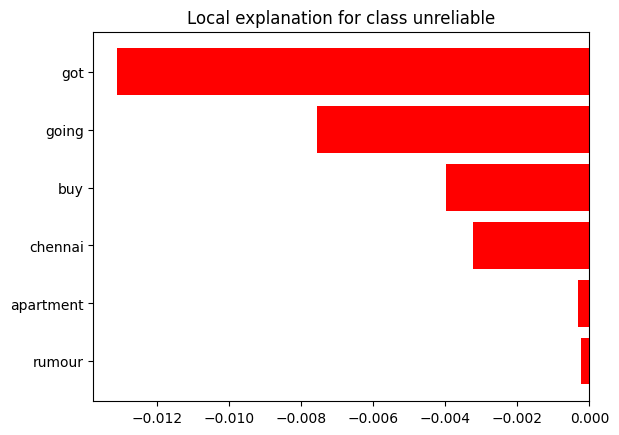

In [45]:
%matplotlib inline
fig = exp.as_pyplot_figure()

## Exercise 3
In this exercise, we will work on how to use a convolutional neural network for classification
on the fake news detection dataset that is provided to you. Import the content from the
`TrainLabels.csv` and `TestLabels.csv` files, perform basic text pre-processing, and do the following:

### (a) 
Prepare word embeddings based on the Word2vec model from previous exercise

In [26]:
TrainLabels = pd.read_csv('TrainLabels.csv')
TestLabels = pd.read_csv('TestLabels.csv')

In [63]:
TrainLabels

id                                              tweet label
0        1  The CDC currently reports 99031 deaths. In gen...  real
1        2  States reported 1121 deaths a small rise from ...  real
2        3  Politically Correct Woman (Almost) Uses Pandem...  fake
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4        5  Populous states can generate large case counts...  real
...    ...                                                ...   ...
6415  6416  A tiger tested positive for COVID-19 please st...  fake
6416  6417  ???Autopsies prove that COVID-19 is??� a blood...  fake
6417  6418  _A post claims a COVID-19 vaccine has already ...  fake
6418  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund  fake
6419  6420  It has been 93 days since the last case of COV...  real

[6420 rows x 3 columns]

In [27]:
TrainLabels['label'] = TrainLabels['label'].replace('real', 0)
TrainLabels['label'] = TrainLabels['label'].replace('fake', 1)

TestLabels['label'] = TestLabels['label'].replace('real', 0)
TestLabels['label'] = TestLabels['label'].replace('fake', 1)

In [28]:
TrainLabels

id                                              tweet  label
0        1  The CDC currently reports 99031 deaths. In gen...      0
1        2  States reported 1121 deaths a small rise from ...      0
2        3  Politically Correct Woman (Almost) Uses Pandem...      1
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...      0
4        5  Populous states can generate large case counts...      0
...    ...                                                ...    ...
6415  6416  A tiger tested positive for COVID-19 please st...      1
6416  6417  ???Autopsies prove that COVID-19 is??� a blood...      1
6417  6418  _A post claims a COVID-19 vaccine has already ...      1
6418  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund      1
6419  6420  It has been 93 days since the last case of COV...      0

[6420 rows x 3 columns]

In [29]:
TrainLabels['clean_tweet'] = clean_text(TrainLabels['tweet'])
TestLabels['clean_tweet'] = clean_text(TestLabels['tweet'])

In [30]:
TrainLabels

id                                              tweet  label  \
0        1  The CDC currently reports 99031 deaths. In gen...      0   
1        2  States reported 1121 deaths a small rise from ...      0   
2        3  Politically Correct Woman (Almost) Uses Pandem...      1   
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...      0   
4        5  Populous states can generate large case counts...      0   
...    ...                                                ...    ...   
6415  6416  A tiger tested positive for COVID-19 please st...      1   
6416  6417  ???Autopsies prove that COVID-19 is??� a blood...      1   
6417  6418  _A post claims a COVID-19 vaccine has already ...      1   
6418  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund      1   
6419  6420  It has been 93 days since the last case of COV...      0   

                                            clean_tweet  
0     the cdc currently reports 99031 deaths in gene...  
1     states reported 1121 deaths small rise from la...  
2     politically correct woman almost uses pandemic...  
3     indiafightscorona we have 1524 covid testing l...  
4     populous states can generate large case counts...  
...                                                 ...  
6415  tiger tested positive for please stay away fro...  
6416  autopsies prove that is blood clot not pneumon...  
6417  _a post claims vaccine has already been develo...  
6418   aamir khan donate 250 cr in pm relief cares fund  
6419  it has been 93 days since the last case of was...  

[6420 rows x 4 columns]

In [31]:
X_3a = preprocess_corpus(TrainLabels['clean_tweet'])
y_3a = TrainLabels['label']

X_3a_test = preprocess_corpus(TestLabels['clean_tweet'])
y_3a_test = TestLabels['label']

print(len(X_3a), len(y_3a))

6420 6420


In [32]:
train_vectors_3a = embedding_feats(X_3a)
print(len(train_vectors_3a))

6420


In [33]:
train_vectors_3a_test = embedding_feats(X_3a_test)
print(len(train_vectors_3a_test))

2140


In [71]:
#Take any classifier (LogisticRegression here, and train/test it like before.
classifier = SVC()
# train_data, test_data, train_y, test_y = train_test_split(X_2b_nn_2, y_2b_nn_2)
train_data = train_vectors_3a 
test_data = train_vectors_3a_test
train_y = y_3a
test_y = y_3a_test

classifier.fit(train_data, train_y)
print("Accuracy: ", classifier.score(test_data, test_y))
preds = classifier.predict(test_data)
print(classification_report(test_y, preds))

Accuracy:  0.9186915887850468
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1120
           1       0.92      0.91      0.91      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140



### (b)
Define a 1D CNN model and report the training and validation accuracy. In addition report the accuracy on the testing data.

In [49]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.0 MB/s eta 0:00:00


In [50]:
#general imports
import os
import sys
import random
random.seed(0) #for reproducability of results

#basic imports
import numpy as np
import pandas as pd


#NN imports
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model, Sequential
from keras.initializers import Constant

#encoder
from sklearn.preprocessing import LabelEncoder

In [51]:
embedding_layer = train_vectors_3a

In [ ]:
# https://american.instructure.com/courses/41325/files/4190762?module_item_id=1548356&fd_cookie_set=1

print('Define a 1D CNN model.')

cnnmodel = Sequential()
cnnmodel.add(embedding_layer)
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(len(trainvalid_labels[0]), activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

cnnmodel.summary()

Define a 1D CNN model.


#### 3b) Answer:

When I try to run the previous cell, the Google Colab session on my computer collapses.